In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, ExtraTreesRegressor
%matplotlib inline

In [2]:
df = pd.read_csv('mydata.csv')

In [3]:
def build_dataframes_for_points(df):
    """
    makes different dataframes that only have data from one surge point
    """
    point_list = [0, 1, 2, 3, 14, 15, 16, 12, 13, 24, 25, 26, 27, 28, 17, 29]
    return [df[df.point == point].reset_index(drop=True)[:31184] for point in point_list]

In [4]:
df_0,df_1,df_2,df_3,df_14,df_15,df_16,df_12,df_13,df_24,df_25,df_26,\
                                                        df_27,df_28,df_17,df_29 = build_dataframes_for_points(df)

In [5]:
array_0 = np.array([df_0.surge[i:i+60] for i in xrange(len(df_0.surge)-60)])
array_0 = array_0[:,::-1]
#make a small hold out sample to conserve the timeseries nature of this, I'll graph it later
hold_out_array = array_0[-500:,:]
y_hold_out = hold_out_array[:,0]
X_hold_out = hold_out_array[:,3:]

# this is for the classical model training and testing
training_testing_array = array_0[:-500,:]
y_0 = training_testing_array[:,0]
X_0 = training_testing_array[:,3:]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_0, y_0, test_size=0.2)

In [7]:
ran_forest = RandomForestRegressor(n_estimators=100)
ran_forest.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [18]:
'Original:',np.mean((ran_forest.predict(X_test) - y_test) ** 2)

('Original:', 0.014373385246493469)

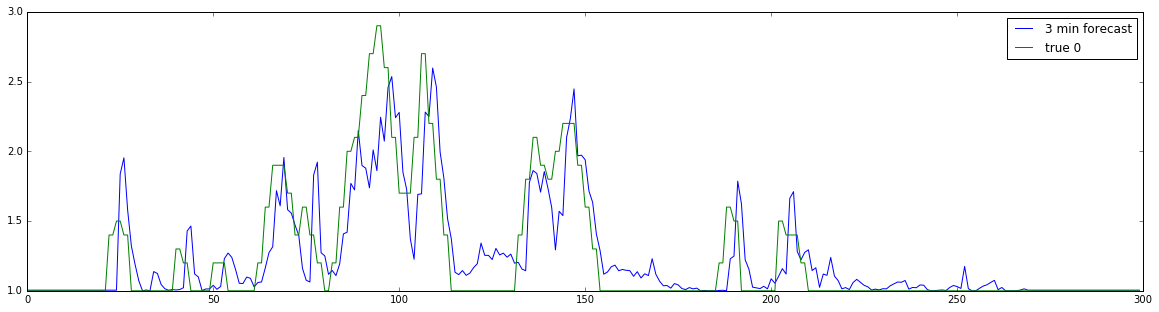

In [9]:
plt.figure(figsize=(20,5))
plt.plot(ran_forest.predict(X_hold_out)[:300],label='3 min forecast')
plt.plot(y_hold_out[:300],label='true 0')
plt.legend()
plt.show()

In [19]:
ex_trees = ExtraTreesRegressor(n_estimators=100)
ex_trees.fit(X_train, y_train)

ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
          max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
          min_samples_split=2, min_weight_fraction_leaf=0.0,
          n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
          verbose=0, warm_start=False)

In [20]:
'Original:',np.mean((ex_trees.predict(X_test) - y_test) ** 2)

('Original:', 0.013331652702402065)